In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
from datetime import datetime

In [3]:
df = pd.read_csv (r'vaccine_data_us_state_timeline.csv')
df.head()

df = df[df['doses_admin_total'].notna()]

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,Province_State,stabbr,dashboard_available,doses_alloc_total,doses_alloc_moderna,doses_alloc_pfizer,doses_alloc_unknown,doses_shipped_total,doses_shipped_moderna,doses_shipped_pfizer,doses_shipped_unknown,doses_admin_total,doses_admin_moderna,doses_admin_pfizer,doses_admin_unknown,people_total,people_total_2nd_dose
4,2020-12-18,Alabama,AL,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5181.0,NaN,5181.0,NaN,5181,NaN
14,2020-12-28,Alabama,AL,Yes,128175.0,NaN,NaN,128175.0,NaN,NaN,NaN,NaN,20354.0,2206.0,18148.0,NaN,20354,NaN
15,2020-12-29,Alabama,AL,Yes,128175.0,NaN,NaN,128175.0,NaN,NaN,NaN,NaN,20354.0,2206.0,18148.0,NaN,20354,NaN
16,2020-12-30,Alabama,AL,Yes,128175.0,NaN,NaN,128175.0,NaN,NaN,NaN,NaN,20354.0,2206.0,18148.0,NaN,20354,NaN
17,2020-12-31,Alabama,AL,Yes,128175.0,NaN,NaN,128175.0,NaN,NaN,NaN,NaN,20354.0,2206.0,18148.0,NaN,20354,NaN


In [5]:
doses_admin = df.pivot(index='Province_State', columns='date',values='people_total_2nd_dose')

In [6]:
d_a = doses_admin.transpose()

In [8]:
d_a.head(60)

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,Connecticut,Delaware,...,Texas,Utah,Vermont,Veterans Health Administration,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [267]:
state = 'Idaho'
d_va = d_a[state].dropna()
d_va.head()

date
2020-12-17     321.0
2020-12-18     944.0
2020-12-19    2306.0
2020-12-20    3582.0
2020-12-21    4348.0
Name: Idaho, dtype: float64

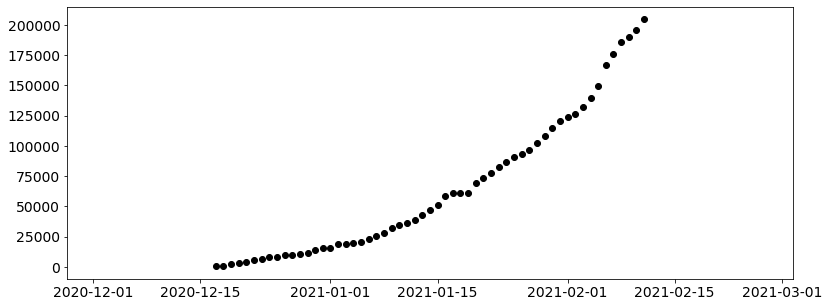

date
2020-12-17     321.0
2020-12-18     944.0
2020-12-19    2306.0
2020-12-20    3582.0
2020-12-21    4348.0
Name: Idaho, dtype: float64

In [268]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(d_a[state].index, d_a[state].values, color="black")
plt.show()
d_va.head()

In [269]:
dates = pd.date_range('2020-12-07', periods=len(d_va), freq="D")
endog = pd.Series(d_va, index=dates)
endog.index = pd.DatetimeIndex(endog.index).to_period('D')
endog = endog.dropna()
endog.head()

2020-12-17     321.0
2020-12-18     944.0
2020-12-19    2306.0
2020-12-20    3582.0
2020-12-21    4348.0
Freq: D, Name: Idaho, dtype: float64

In [270]:
selection_res = ar_select_order(endog, maxlag = 1, old_names=True, seasonal=False)
pandas_ar_res = selection_res.model.fit()

In [271]:
pred = pandas_ar_res.predict(start='2021-02-12', end='2021-08-22').round(0)

pred.head()

2021-02-12    202994.0
2021-02-13    211977.0
2021-02-14    221311.0
2021-02-15    231010.0
2021-02-16    241087.0
Freq: D, dtype: float64

In [273]:
immunity = pd.DataFrame(columns=['vaccinated', 'state'], index=pd.to_datetime([]))
vacc = pd.DataFrame(columns=['vaccinated', 'state'], index=pd.to_datetime([]))

for num in pred:
   if(num > 13039723.5):
        vacc = pd.DataFrame(columns=['vaccinated', 'state'], index=pd.to_datetime([]))
        vaccination_day = pred.loc[pred==num]
        print(vaccination_day)
        vacc['vaccinated'] = vaccination_day
        vacc['state'] = state
        immunity = immunity.append(vacc)
        print("Terminating the loop")
        break

2021-05-29    13326624.0
Freq: D, dtype: float64
Terminating the loop


In [274]:
immunity

,vaccinated,state
2021-05-29,13326624.0,Idaho


In [201]:
vacc = pd.DataFrame(columns=['vaccinated', 'state'])
vacc

,vaccinated,state


In [207]:
vacc['vaccinated'] = vaccination_day
vacc['state'] = state
vacc

,vaccinated,state
2021-04-19,13380261.0,Virginia


In [211]:
immunity.append(vacc)

,vaccinated,state
2021-04-19,13380261.0,Virginia


In [178]:
pred.loc[pred == 13380261.0]

2021-04-19    13380261.0
Freq: D, dtype: float64